# TASK 8- Heart Attack Analysis & Prediction
## Registration ID- SIRSS2248
## Name- Arpita Maharatha

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
#checking for duplicate values
df.duplicated().sum()

1

In [11]:
#dropping the duplicated row
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualisation

C:\Users\Arpita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age of the Patients')

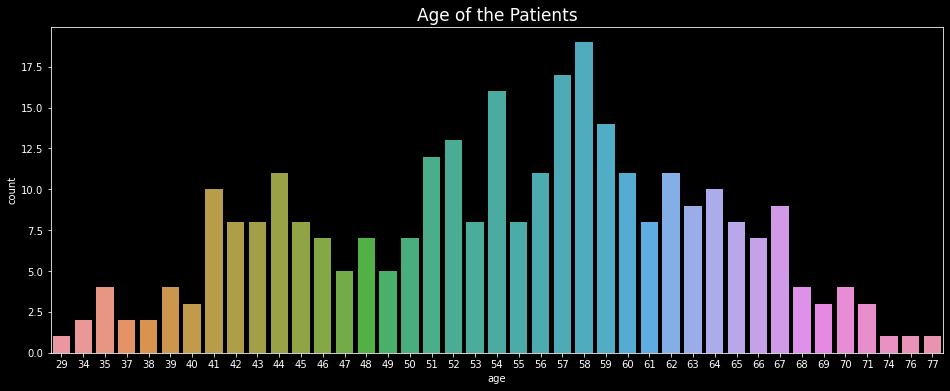

In [13]:
plt.figure(figsize = (16,6))
sns.countplot(df['age'])
plt.title('Age of the Patients',fontsize=17)

Text(0.5, 1.0, 'Gender Vs Heart Attack coun')

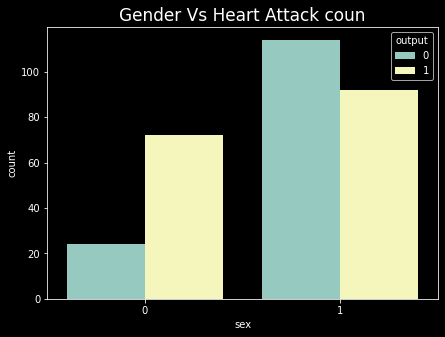

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='sex', hue='output', data=df)
plt.title('Gender Vs Heart Attack coun',fontsize=17)

Text(0.5, 1.0, 'Chest Pain distribution with respect to Heart Attack')

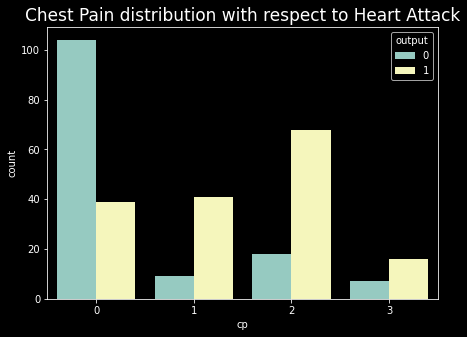

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x='cp',hue='output',data=df)
plt.title('Chest Pain distribution with respect to Heart Attack', fontsize=17)

Text(0.5, 1.0, 'Cholestrol Variation w.r.t Heart Attack')

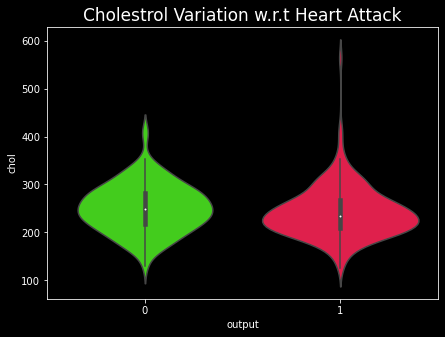

In [16]:
plt.figure(figsize=(7,5))
sns.violinplot(x='output',y='chol',data=df, palette = 'prism')
plt.title('Cholestrol Variation w.r.t Heart Attack', fontsize=17)

Text(0.5, 1.0, 'Fasting Blood Sugar w.r.t. Heart Attack')

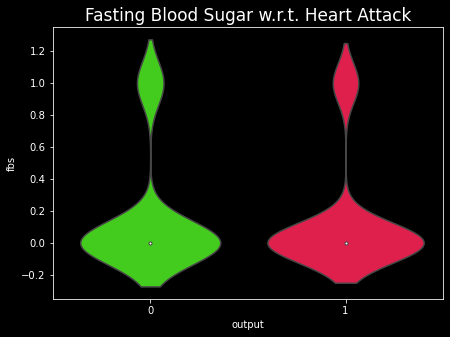

In [17]:
plt.figure(figsize=(7,5))
sns.violinplot(x='output',y='fbs',data=df, palette = 'prism')
plt.title('Fasting Blood Sugar w.r.t. Heart Attack', fontsize=17)

Text(0.5, 1.0, 'Chest Pain w.r.t Resting Blood Pressure')

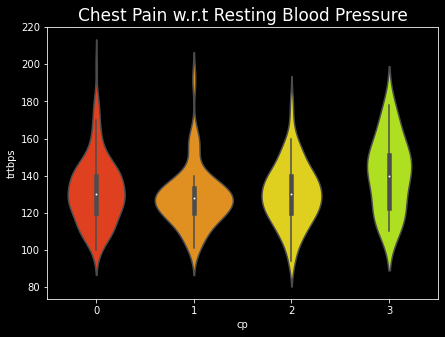

In [18]:
plt.figure(figsize=(7,5))
sns.violinplot(x='cp',y='trtbps',data=df, palette = 'prism')
plt.title('Chest Pain w.r.t Resting Blood Pressure', fontsize=17)

C:\Users\Arpita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

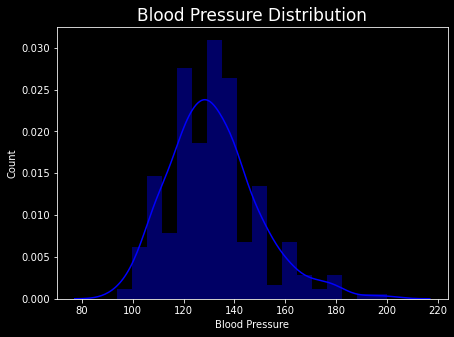

In [19]:
plt.figure(figsize=(7,5))
sns.distplot(df['trtbps'], color='Blue')
plt.title('Blood Pressure Distribution', fontsize=17)
plt.xlabel('Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)

C:\Users\Arpita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

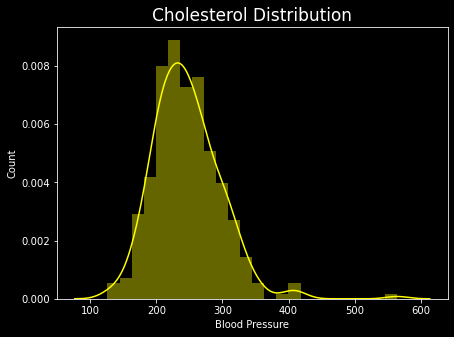

In [20]:
plt.figure(figsize=(7,5))
sns.distplot(df['chol'], color='Yellow')
plt.title('Cholesterol Distribution', fontsize=17)
plt.xlabel('Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)

Text(0.5, 1.0, 'Rate of Heart Attack with Age and Cholesterol')

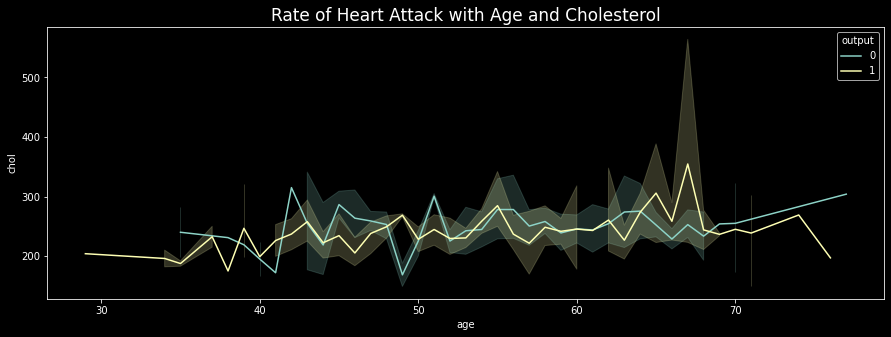

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x='age',y='chol',hue='output',data=df)
plt.title('Rate of Heart Attack with Age and Cholesterol', fontsize=17)

Text(0.5, 1.0, 'Rate of Heart Attack with Age and Heart Rate')

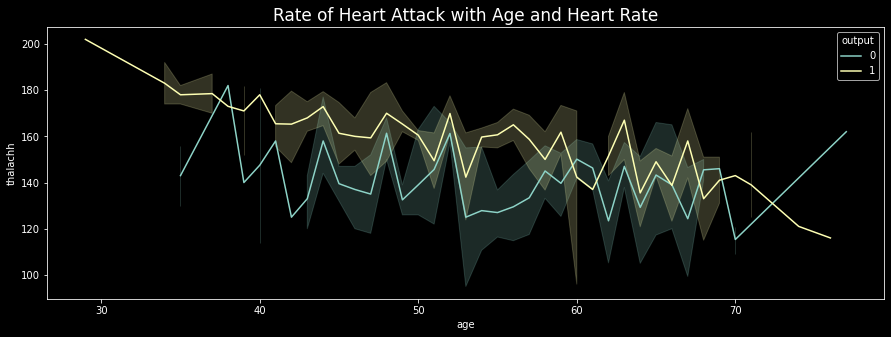

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x='age',y='thalachh',hue='output',data=df)
plt.title('Rate of Heart Attack with Age and Heart Rate', fontsize=17)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'sex'),
  Text(2.5, 0, 'cp'),
  Text(3.5, 0, 'trtbps'),
  Text(4.5, 0, 'chol'),
  Text(5.5, 0, 'fbs'),
  Text(6.5, 0, 'restecg'),
  Text(7.5, 0, 'thalachh'),
  Text(8.5, 0, 'exng'),
  Text(9.5, 0, 'oldpeak'),
  Text(10.5, 0, 'slp'),
  Text(11.5, 0, 'caa'),
  Text(12.5, 0, 'thall'),
  Text(13.5, 0, 'output')])

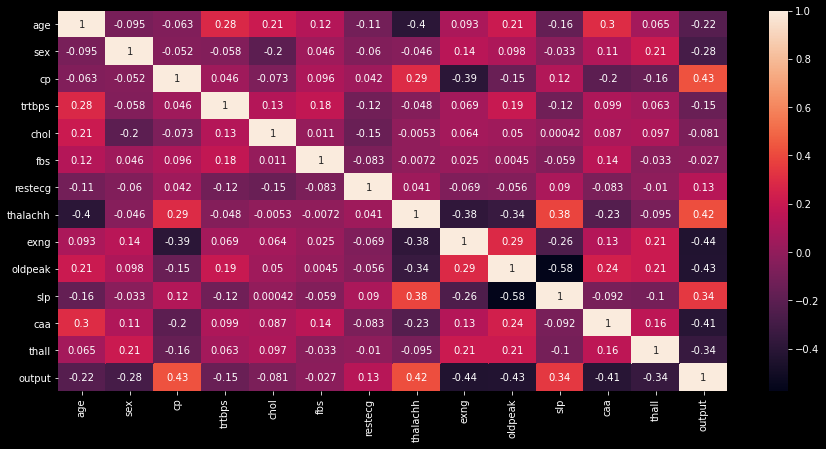

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)

### Model Training

In [24]:
X_train = df.drop(['output'],axis =1).values
Y_train = df['output'].values
x_train , x_test , y_train , y_test = train_test_split(X_train, Y_train, test_size = 0.20)

In [25]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(241, 13) (61, 13) (241,) (61,)


In [26]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred1 = model1.predict(x_test)
y_pred1

array([ 0.863928  ,  1.12747951,  0.98513922,  0.79577403,  0.22350994,
        0.18788216,  0.64357743, -0.05386897,  0.67323616,  0.83836903,
       -0.07538664,  0.34584618,  0.56760953,  0.5351524 , -0.21744525,
        0.38063177,  0.20041763,  0.19464337,  0.6669484 ,  0.3513628 ,
        0.97562698,  1.06249996,  0.69774947,  0.1859846 ,  0.62858908,
       -0.1496119 ,  0.97577587,  0.55395159,  0.46041849,  0.69904469,
        0.8769698 , -0.24872527,  0.88200312,  0.1453193 ,  0.56203147,
       -0.11478668,  1.0983958 ,  0.68079232,  1.22089599,  0.36154956,
       -0.13326421,  0.10852333,  0.61846227,  0.79785793, -0.15662961,
        0.73503789,  0.38513896,  0.70500346,  1.26001201,  0.19603154,
        0.58369193,  0.62058446,  0.59991454,  0.62242789,  0.2445197 ,
        0.17534938,  0.73595235,  0.05457688,  0.59584673,  0.75598722,
        0.4840173 ])

In [28]:
model1.intercept_

0.7768264688958737

In [29]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

C:\Users\Arpita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred2 = model2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.819672131147541

In [31]:
model3 = SVC()
model3.fit(x_train, y_train)

SVC()

In [32]:
y_pred3 = model2.predict(x_test)
accuracy_score(y_test,y_pred3)

0.819672131147541